In [10]:
from pdf2image import convert_from_path, pdfinfo_from_path
import pytesseract
import cv2
from PIL import Image
pop_path='/opt/homebrew/Cellar/poppler/24.04.0/bin'
import re

In [4]:
pages=convert_from_path("pd1.pdf") #converts pdf to image

In [6]:
pages

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1867x2000>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=2000x1398>]

## without CV2

In [8]:
pytesseract.pytesseract.tesseract_cmd='/opt/homebrew/bin/tesseract'
text=pytesseract.image_to_string(pages[0])
print(text)

47/12/2020

Patient Medical Record

Patient Information Birth Date
Kathy Crawford May 6 1972
(737) 988-0851 Weight
9264 Ash Dr 95
New York City, 10005 .
United States Height:
190
In Case of Emergency
m _ a _
Simeone Crawford 9266 Ash Dr
New York City, New York, 10005
Home phone United States
(990) 375-4621
Work phone
Genera! Medical History

Chicken Pox (Varicella):

IMMUNE

Have you had the Hepatitis B vaccination?

No

List any Medical Problems (asthma, seizures, headaches):

Migraine



In [5]:
import numpy as np
def preprocess(img):
    gray=cv2.cvtColor(np.array(img),cv2.COLOR_BGR2GRAY)
    resized_img=cv2.resize(gray,None,fx=1.5,fy=1.5,interpolation=cv2.INTER_LINEAR)
    final_img=cv2.adaptiveThreshold(resized_img,255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    61,
    11)
    return final_img

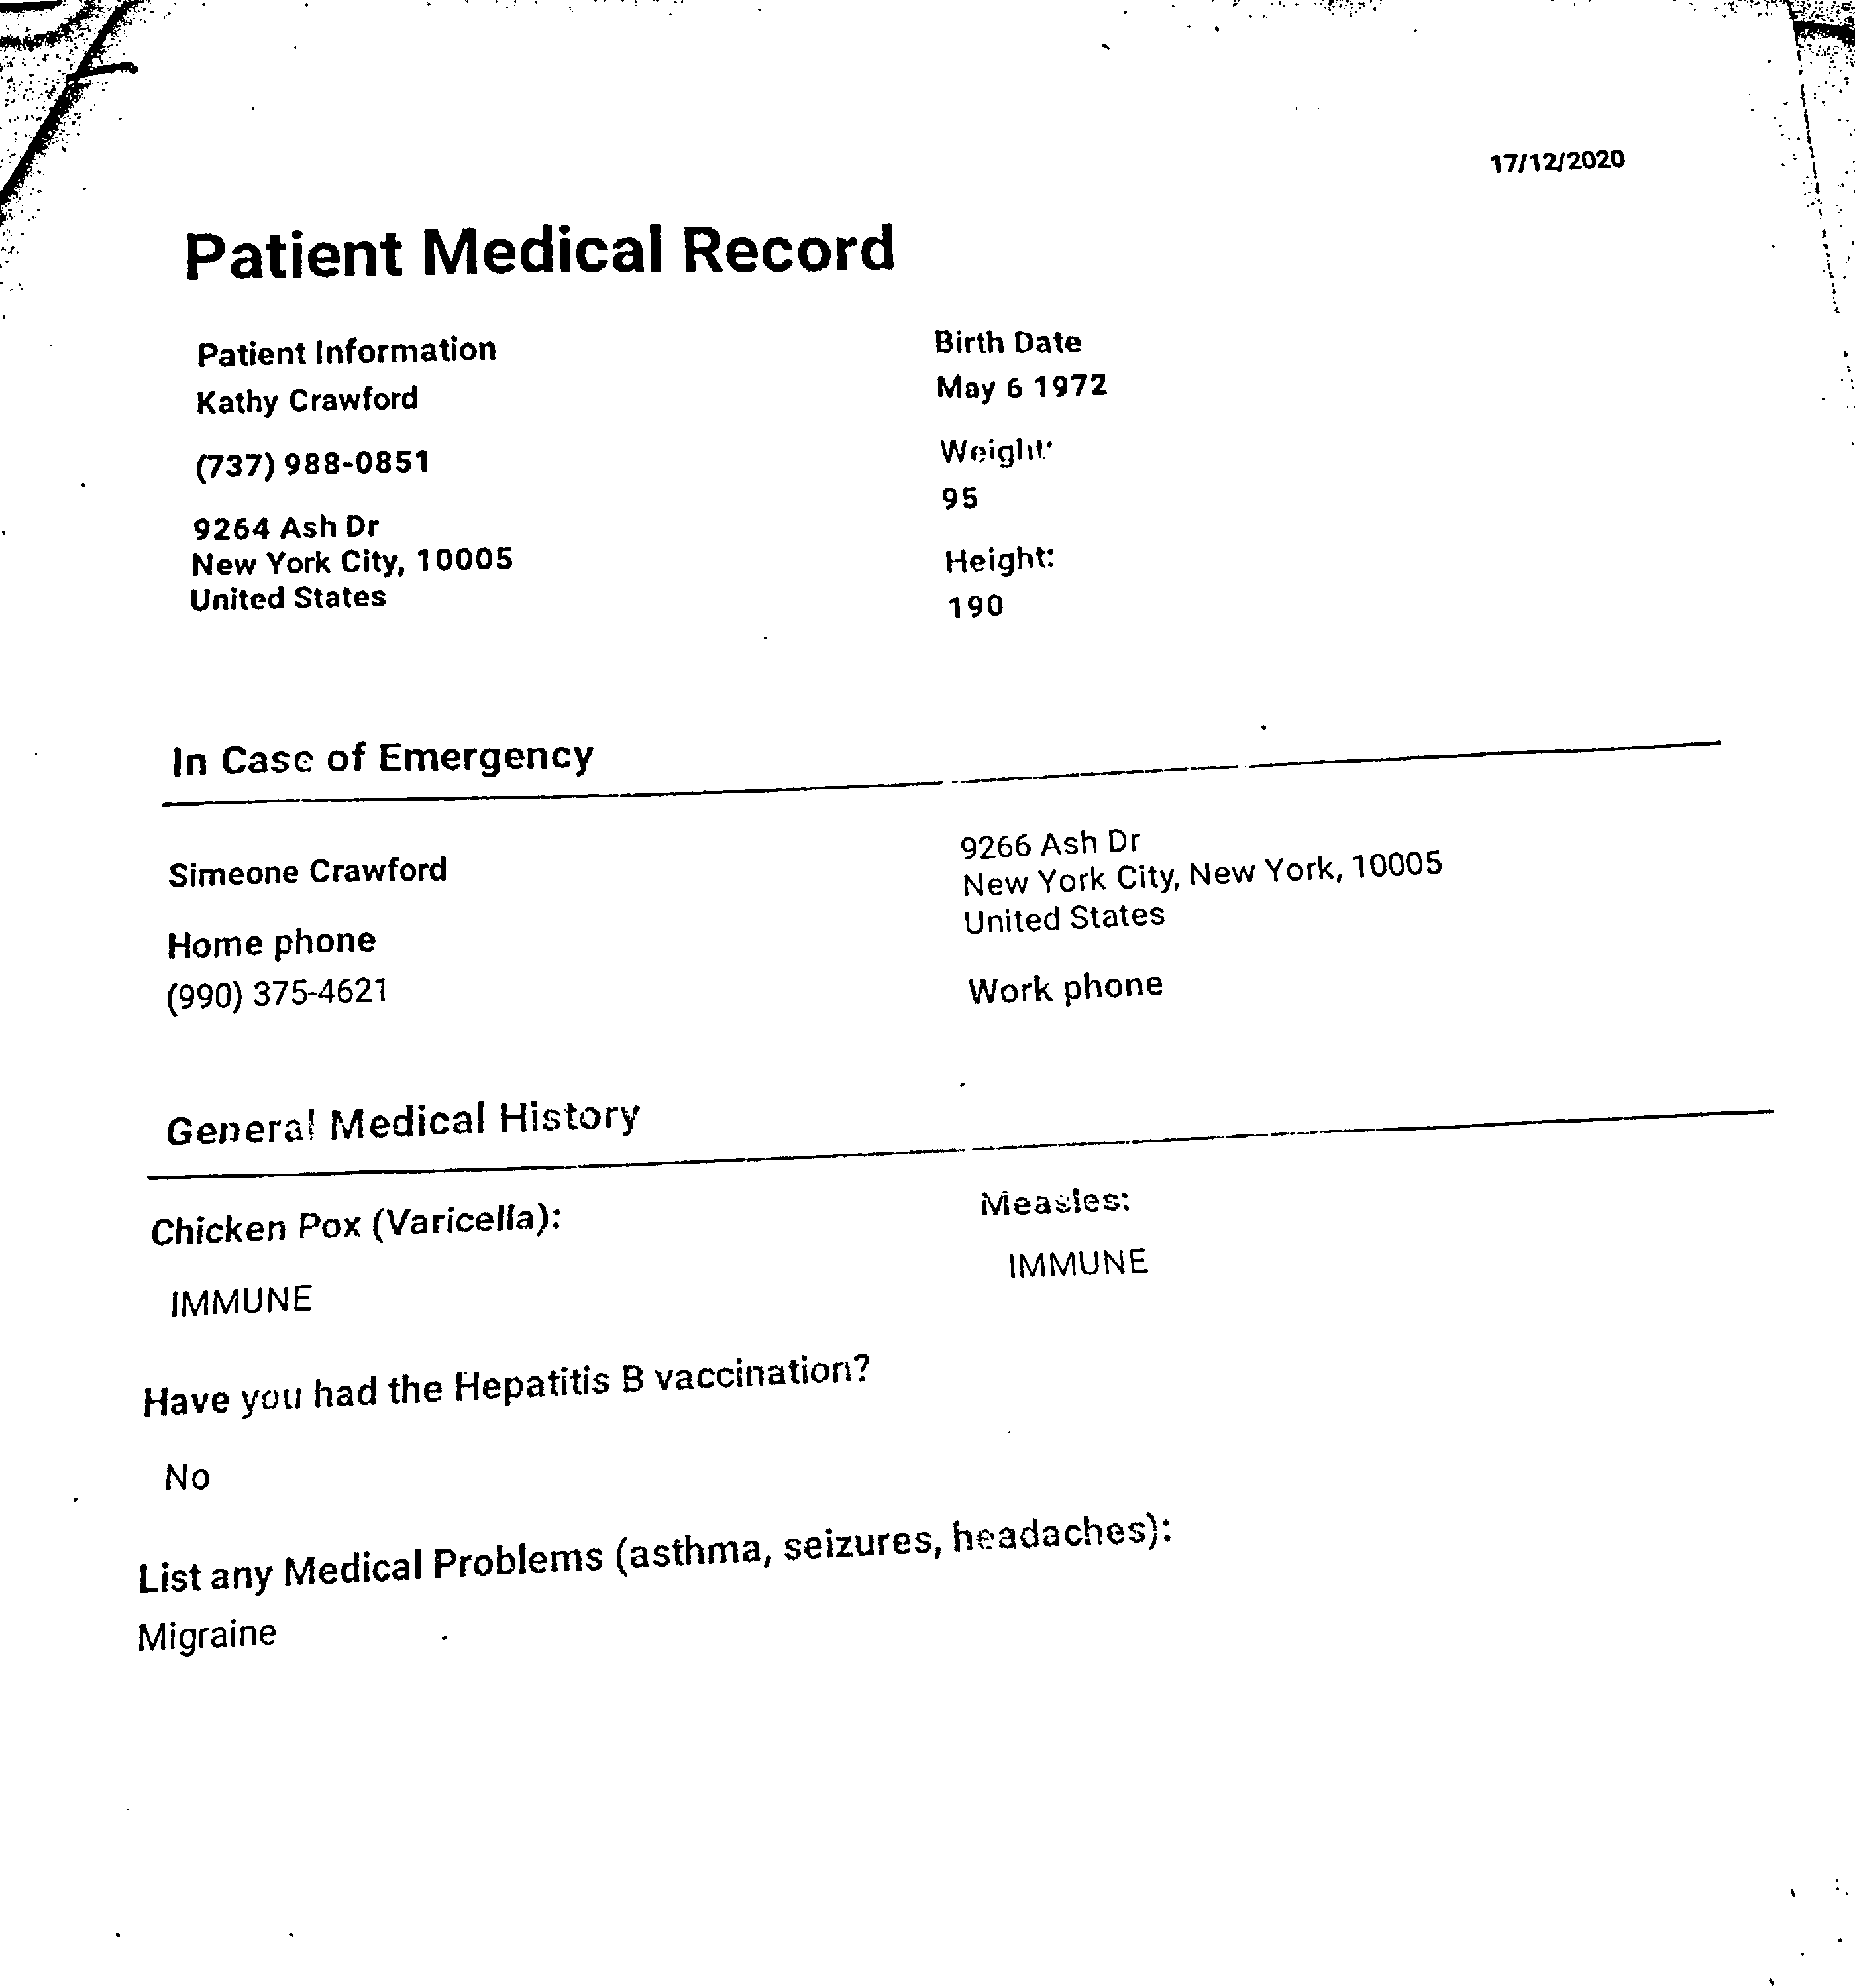

In [6]:
Image.fromarray(preprocess(pages[0]))

In [43]:
img  = Image.fromarray(preprocess(pages[0]))

In [44]:
text = pytesseract.image_to_string(img, lang='eng')

python(73170) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [45]:
print(text)

17/12/2020

Patient Medical Record

Patient Information Birth Date
Kathy Crawford May 6 1972
(737) 988-0851 Weight’
9264 Ash Dr 95
New York City, 10005 ‘
United States Height:
190
In Casc of Emergency
7 ee
Simeone Crawford 9266 Ash Dr
New York City, New York, 10005
Home phone United States
(990) 375-4621
Work phone

Genera! Medical History

a

a

a ea A CE i a

Chicken Pox (Varicella): Measies:

IMMUNE IMMUNE

Have you had the Hepatitis B vaccination?
No

List any Medical Problems (asthma, seizures, headaches}:

Migraine

CO
aa



## Extract Name

In [13]:
pattern = "Patient Information(.*?)\(\d{3}\)"

matches = re.findall(pattern,text,flags =re.DOTALL)
print(matches)

[' Birth Date\nKathy Crawford May 6 1972\n']


In [21]:
match = matches[0].replace("Birth Date","").strip()
match

'Kathy Crawford May 6 1972'

In [25]:
pattern = '((Jan|Feb|March|April|May|June|July|Aug|Sep|Oct|Nov|Dec)[ \d]+)'
Date = re.findall(pattern,match)
Date[0][0]


'May 6 1972'

In [34]:
def remove_noise_from_name(name):
    name = name.replace("Birth Date","").strip()
    pattern = '((Jan|Feb|March|April|May|June|July|Aug|Sep|Oct|Nov|Dec)[ \d]+)'
    date_matches = re.findall(pattern,name)
    
    if date_matches:
        date = date_matches[0][0]
        name = name.replace(date,"").strip()
    return name
    




In [35]:
remove_noise_from_name(matches[0])

'Kathy Crawford'

## Extract Phone

In [41]:
pattern = "Patient Information.*?(\(\d{3}\) \d{3}-\d{4})"
matches = re.findall(pattern,text,flags = re.DOTALL)
matches[0]

'(737) 988-0851'

## Extract Vaccine

In [42]:
pattern = "Have you had the Hepatitis B vaccination?.*(No|Yes)"
matches = re.findall(pattern,text,flags = re.DOTALL)
matches[0]

'No'

## Extract medical problems

In [60]:
pattern = "List any Medical Problems \(asthma, seizures, headaches}:(.*)CO"
matches = re.findall(pattern,text,flags = re.DOTALL)
matches[0].strip()


'Migraine'

In [57]:
pattern = "List any Medical Problems \(asthma, seizures, headaches}:(.*)CO"
matches = re.findall(pattern,text2,flags = re.DOTALL)
matches

[]

# 2nd page 

In [48]:
pages_2=convert_from_path("pd2.pdf") #converts pdf to image

python(24428) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(24429) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(24431) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [51]:
pages_2[0].show()

python(24434) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(24436) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [ ]:
'''17/12/2020
Patient Medical Record
Patient Information
Jerry Lucas
(279) 920-8204
4218 Wheeler Ridge Dr
Buffalo, New York, 14201
United States
Birth Date
May 2 1998
Weight:
57
Height:
170
In Case of Emergency
Joe Lucas
Home phone
4218 Wheeler Ridge Dr
Buffalo, New York, 14201
United States
Work phone
General Medical History
Chicken Pox (Varicella):
IMMUNE
Have you had the Hepatitis B vaccination?
Yes
Measles:
NOT IMMUNE
List any Medical Problems (asthma, seizures, headaches):
N/A'''

In [54]:
text2 = '''17/12/2020
Patient Medical Record
Patient Information
Jerry Lucas
(279) 920-8204
4218 Wheeler Ridge Dr
Buffalo, New York, 14201
United States
Birth Date
May 2 1998
Weight:
57
Height:
170
In Case of Emergency
Joe Lucas
Home phone
4218 Wheeler Ridge Dr
Buffalo, New York, 14201
United States
Work phone
General Medical History
Chicken Pox (Varicella):
IMMUNE
Have you had the Hepatitis B vaccination?
Yes
Measles:
NOT IMMUNE
List any Medical Problems (asthma, seizures, headaches):
N/A'''